In [1]:
import yfinance as yf

In [2]:
# Download Stocks
stocks = yf.download(tickers=['SPY', 'QQQ'], start='2020-1-1',
                     progress=False
                     ).Close

In [3]:
stocks.head()

Ticker,QQQ,SPY
Date,,
2020-01-02 00:00:00+00:00,216.160004,324.869995
2020-01-03 00:00:00+00:00,214.179993,322.410004
2020-01-06 00:00:00+00:00,215.559998,323.640015
2020-01-07 00:00:00+00:00,215.529999,322.730011
2020-01-08 00:00:00+00:00,217.149994,324.450012


In [4]:
centered_returns = stocks.pct_change().dropna() - stocks.pct_change().mean()

<Axes: xlabel='Date'>

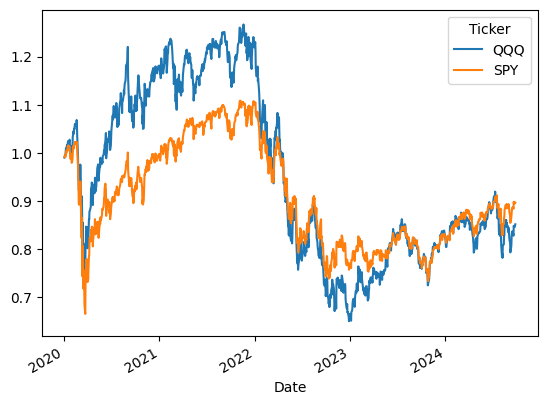

In [5]:
centered_returns.add(1).cumprod().plot()

In [6]:
S = centered_returns.cov()
print(S)

Ticker       QQQ       SPY
Ticker                    
QQQ     0.000269  0.000206
SPY     0.000206  0.000183


In [7]:
import numpy as np

E = np.linalg.eig(S)

# EigenValues
print("Eigenvalues")
eValues = E[0]
eValues

Eigenvalues


array([4.36761918e-04, 1.54483263e-05])

In [8]:

# EigenValues
print("EigenVectors - Each column is an EigenVector, look closely they are perpendicular!")
eVectors = E[1]
eVectors

EigenVectors - Each column is an EigenVector, look closely they are perpendicular!


array([[ 0.77638953, -0.63025335],
       [ 0.63025335,  0.77638953]])

In [9]:
# Plot the Correlation of Stock Centered Returns

x_axis = np.linspace(np.nanmin(centered_returns.SPY),
                     np.nanmax(centered_returns.SPY))

In [10]:
dx1 = eVectors[0, 0]
dy1 = eVectors[1, 0]

slope1 = dy1 / dx1

dx2 = eVectors[0, 1]
dy2 = eVectors[1, 1]

slope2 = dy2 / dx2

y_axis1 = slope1 * x_axis
y_axis2 = slope2 * x_axis

In [11]:
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

Text(0.5, 0, 'R0 Values')

Text(0, 0.5, 'R1 Values')

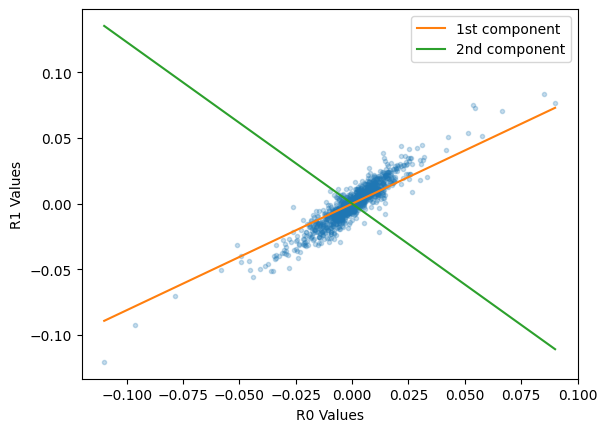

In [12]:
# 3. Plot Principal Components
import matplotlib.pyplot as plt
plt.plot(centered_returns.SPY, centered_returns.QQQ, '.', alpha=.25)
plt.plot(x_axis, y_axis1, label="1st component")
plt.plot(x_axis, y_axis2, label="2nd component")
plt.legend()

plt.xlabel('R0 Values')
plt.ylabel('R1 Values')

In [13]:
# Download equities
equities = yf.download(tickers='GOOG,AMZN,NFLX,BAC,JPM,WFC'.split(','), start='2020-1-1',
                       progress=False
                       ).Close
equities.head()

Ticker,AMZN,BAC,GOOG,JPM,NFLX,WFC
Date,,,,,,
2020-01-02 00:00:00+00:00,94.900497,35.639999,68.368500,141.089996,329.809998,53.750000
2020-01-03 00:00:00+00:00,93.748497,34.900002,68.032997,138.339996,325.899994,53.419998
2020-01-06 00:00:00+00:00,95.143997,34.849998,69.710503,138.229996,335.829987,53.099998
2020-01-07 00:00:00+00:00,95.343002,34.619999,69.667000,135.880005,330.750000,52.660000
2020-01-08 00:00:00+00:00,94.598503,34.970001,70.216003,136.940002,339.260010,52.820000


In [14]:
def pca(assets, sorted=True):
    
    x = assets.pct_change().dropna()

    evalues, evectors = np.linalg.eig((x - x.mean()).cov())

    sorted_indices = np.argsort(evalues)[::-1]
    sorted_evalues = evalues[sorted_indices]
    sorted_evectors = evectors[:, sorted_indices]
    if sorted:
        return sorted_evalues/sum(evalues), sorted_evectors
    else:
        return evalues, evectors

In [15]:
evalues, _ = pca(equities)

C:\Users\lyu\AppData\Local\Temp\ipykernel_9500\2660855762.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  x = assets.pct_change().dropna()


Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Explained Variance')

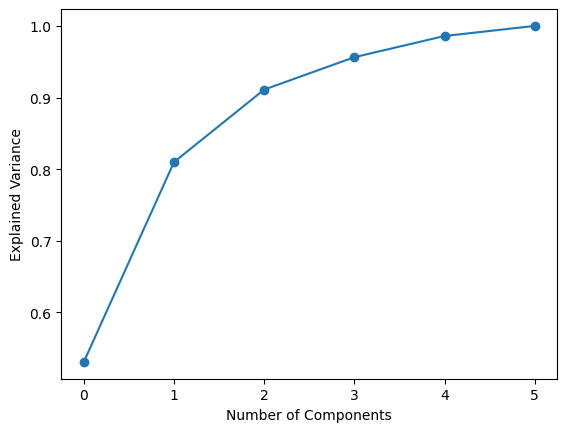

In [16]:
plt.plot(np.cumsum(evalues), '-o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

## Factor Analysis

In [17]:
tech_stocks = equities.iloc[:, :3]

bank_stocks = equities.iloc[:, 3:]

commodities = yf.download(
    'CL=F,RB=F,GC=F', start='2020-1-1', progress=False).Close

In [18]:
import pandas as pd
all = pd.concat([equities, commodities], axis=1)

In [19]:
lookback = 50

R = all.iloc[-lookback:]
R = R[['AMZN', 'GOOG', 'NFLX', 'BAC', 'JPM', 'WFC', "CL=F", "GC=F", "RB=F"]]
R.head()

Ticker,AMZN,GOOG,NFLX,BAC,JPM,WFC,CL=F,GC=F,RB=F
Date,,,,,,,,,
2024-07-17 00:00:00+00:00,187.929993,182.619995,647.460022,43.980000,216.869995,60.910000,82.849998,2454.800049,2.5013
2024-07-18 00:00:00+00:00,183.750000,179.220001,643.039978,43.009998,209.979996,59.240002,82.820000,2451.800049,2.5164
2024-07-19 00:00:00+00:00,183.130005,179.389999,633.340027,42.900002,209.779999,59.230000,80.129997,2395.500000,2.4504
2024-07-22 00:00:00+00:00,182.550003,183.350006,647.500000,42.299999,210.279999,59.139999,79.779999,2392.000000,2.4706
2024-07-23 00:00:00+00:00,186.410004,183.600006,642.760010,42.410000,210.330002,59.669998,76.959999,2404.600098,2.4141


In [21]:
e, v = pca(R, sorted=False)

C:\Users\lyu\AppData\Local\Temp\ipykernel_9500\2660855762.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  x = assets.pct_change().dropna()


In [22]:
np.set_printoptions(precision=2, suppress=True)

In [23]:
e

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
colour = ['r']*3 + ['b']*3 + ['g']*3

In [25]:
symbols = ['AMZN', 'GOOG', 'NFLX', 'BAC', 'JPM', 'WFC', "CL=F", "GC=F", "RB=F"]

[-0.43 -0.3  -0.27 -0.27 -0.3  -0.34 -0.42 -0.08 -0.44] 

[-0.37 -0.2  -0.09 -0.25 -0.15 -0.36  0.54  0.01  0.56] 

[ 0.4   0.52  0.22 -0.33 -0.34 -0.5  -0.07  0.2  -0.02] 

[ 0.68 -0.44 -0.47  0.01 -0.21 -0.05  0.25 -0.07 -0.11] 

[-0.21  0.37 -0.41  0.2   0.14 -0.08  0.46  0.42 -0.46] 

[-0.09  0.36 -0.48  0.04 -0.52  0.43 -0.22  0.02  0.35] 

[ 0.07  0.33 -0.44 -0.25  0.54 -0.2  -0.11 -0.53  0.11] 

[-0.06  0.14  0.1   0.7  -0.29 -0.35  0.09 -0.51 -0.04] 

[-0.07  0.14  0.22 -0.4  -0.25  0.39  0.44 -0.48 -0.36] 



Text(0.5, 1.0, 'Factor Groupings')

Text(0.5, 0, 'First Component')

Text(0, 0.5, 'Second Component')

(-1.0999998901914063,
 1.0999976940195335,
 -1.0999993960525691,
 1.0999993960525691)

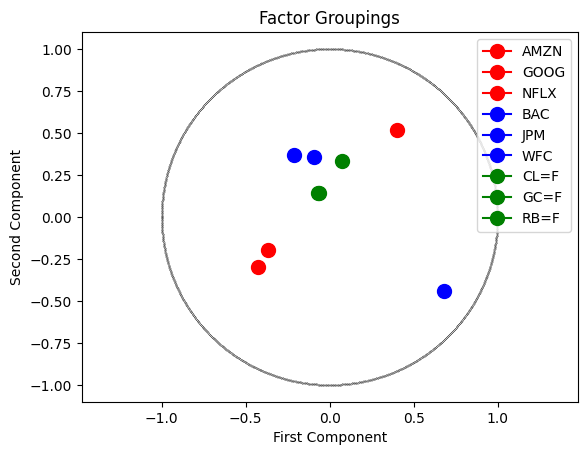

In [26]:
for j, i in enumerate(zip(v.T, symbols)):
    print(i[0], '\n')
    _ = plt.plot(i[0][0], i[0][1], '-o', c=colour[j], ms=10, label=i[1])


for i in np.linspace(-np.pi, np.pi, 1500):
    _ = plt.plot(np.cos(i), np.sin(i), 'k.', ms=.3)

plt.title('Factor Groupings')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.axis('equal')
plt.legend(loc="upper right")